Klasifikasi Sampah

1. Nathanael Jeshua Paat
2. Aida Nurrohmah
3. Isni Agustina Arifin

Import Library

In [ ]:
!pip install keras -tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 113.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 80.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
import cv2
import datetime
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_hub as hub

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#utility & processing
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#keras tuner
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

#warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.5 MB/s eta 0:00:00


Download dan Unzip Dataset

In [ ]:
# https://drive.google.com/file/d/150855rVh-srkGhdywBsPK4_mHSZCwRWg/view?usp=sharing
!gdown 150855rVh-srkGhdywBsPK4_mHSZCwRWg

Downloading...
From: https://drive.google.com/uc?id=150855rVh-srkGhdywBsPK4_mHSZCwRWg
To: /content/Dataset.zip
100% 40.9M/40.9M [00:00<00:00, 42.2MB/s]


In [ ]:
%%capture
!unzip Dataset.zip;

In [ ]:
BATCH_SIZE = 64
EPOCHS = 50
IM_HEIGHT = 224
IM_WIDTH = 224

AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.random.set_seed(10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for dirname, _, filenames in os.walk('/content/Garbage classification'):
    print(dirname)

/content/Garbage classification
/content/Garbage classification/cardboard
/content/Garbage classification/paper
/content/Garbage classification/metal
/content/Garbage classification/glass
/content/Garbage classification/plastic


In [ ]:
filenames = tf.io.gfile.glob('/content/Garbage classification/*/*')
print(len(filenames))
filenames[:3]

2390


['/content/Garbage classification/cardboard/cardboard191.jpg',
 '/content/Garbage classification/cardboard/cardboard210.jpg',
 '/content/Garbage classification/cardboard/cardboard242.jpg']

In [ ]:
data = pd.DataFrame()
for el in range(0, len(filenames)):
    target = filenames[el].split('/')[-2]
    path = filenames[el]

    data.loc[el, 'filename'] = path
    data.loc[el, 'class'] = target

print(data['class'].value_counts(dropna=False))
data

paper        594
glass        501
plastic      482
metal        410
cardboard    403
Name: class, dtype: int64


,filename,class
0,/content/Garbage classification/cardboard/card...,cardboard
1,/content/Garbage classification/cardboard/card...,cardboard
2,/content/Garbage classification/cardboard/card...,cardboard
3,/content/Garbage classification/cardboard/card...,cardboard
4,/content/Garbage classification/cardboard/card...,cardboard
...,...,...
2385,/content/Garbage classification/metal/metal377...,metal
2386,/content/Garbage classification/metal/metal167...,metal
2387,/content/Garbage classification/metal/metal28.jpg,metal
2388,/content/Garbage classification/metal/metal158...,metal


Mengacak Data

In [ ]:
data = shuffle(data, random_state=42)
data.reset_index(drop=True, inplace=True)
data

,filename,class
0,/content/Garbage classification/paper/paper66.jpg,paper
1,/content/Garbage classification/paper/paper444...,paper
2,/content/Garbage classification/glass/glass163...,glass
3,/content/Garbage classification/glass/glass161...,glass
4,/content/Garbage classification/cardboard/card...,cardboard
...,...,...
2385,/content/Garbage classification/plastic/plasti...,plastic
2386,/content/Garbage classification/paper/paper267...,paper
2387,/content/Garbage classification/paper/paper574...,paper
2388,/content/Garbage classification/paper/paper590...,paper


In [ ]:
change = {
'cardboard' : '0',
'glass': '1',
'metal' : '2',
'paper' : '3',
'plastic' : '4'
}

data['class'] = data['class'].map(change)
data

,filename,class
0,/content/Garbage classification/paper/paper66.jpg,3
1,/content/Garbage classification/paper/paper444...,3
2,/content/Garbage classification/glass/glass163...,1
3,/content/Garbage classification/glass/glass161...,1
4,/content/Garbage classification/cardboard/card...,0
...,...,...
2385,/content/Garbage classification/plastic/plasti...,4
2386,/content/Garbage classification/paper/paper267...,3
2387,/content/Garbage classification/paper/paper574...,3
2388,/content/Garbage classification/paper/paper590...,3


In [ ]:
indexes=[]

def func(x):
    if x[-4:] != '.jpg':
        idx = data[data['filename'] == x].index
        indexes.append(idx[0])
        print(idx[0], x)
    return x

data['filename'].map(func)

print(data.shape)
data.drop(index=indexes, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

(2390, 2)
(2390, 2)


In [ ]:
for el in range(100, 120):
    path = data.loc[el, 'filename']
    img  = cv2.imread(path)
    print(img.shape)

(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)


Membagi Dataset

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['class'])
print(train_data['class'].value_counts(dropna=False))
print(test_data['class'].value_counts(dropna=False))

3    475
1    401
4    386
2    328
0    322
Name: class, dtype: int64
3    119
1    100
4     96
2     82
0     81
Name: class, dtype: int64


Augmentasi Data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
                  train_data,
                  x_col="filename",
                  y_col="class",
                  target_size=(IM_HEIGHT, IM_WIDTH),
                  class_mode='categorical',
                  batch_size= BATCH_SIZE,
                  color_mode='rgb',
                  shuffle=True,
                  num_parallel_calls=AUTOTUNE)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
                 test_data,
                 x_col="filename",
                 y_col="class",
                 target_size=(IM_HEIGHT, IM_WIDTH),
                 class_mode='categorical',
                 batch_size= BATCH_SIZE,
                 color_mode='rgb',
                 shuffle=False,
                 num_parallel_calls=AUTOTUNE)

Found 1912 validated image filenames belonging to 5 classes.
Found 478 validated image filenames belonging to 5 classes.


Arsitektur Model

In [ ]:
# Menggunakan URL model EfficientNetV2 dari TensorFlow Hub
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2"

# Membuat model menggunakan EfficientNetV2 dari TensorFlow Hub
trf_lr_efficientnet_model = tf.keras.Sequential([
    hub.KerasLayer(efficientnet_url, trainable=False),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
trf_lr_efficientnet_model.build([None, IM_HEIGHT, IM_WIDTH, 3])

# Mengompilasi model
F_1_macro = tfa.metrics.f_scores.F1Score(num_classes=5, average="macro", name='f1_macro')
trf_lr_efficientnet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=F_1_macro
)
trf_lr_efficientnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              53150388  
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 53808825 (205.26 MB)
Trainable params: 658437 (2.51 MB)
Non-trainable params: 53150388 (202.75 MB)
_________________________________________________________________


In [ ]:
init_time = datetime.datetime.now()


train_steps = train_generator.samples // BATCH_SIZE
valid_steps = test_generator.samples // BATCH_SIZE

early_stopping = EarlyStopping(monitor="val_loss", patience=8, mode="min")
checkpoint = ModelCheckpoint("loss-{val_loss:.4f}.h5", monitor="val_loss", verbose=0,
                             save_best_only=True, save_weights_only=True, mode="min")
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=4,
                                            min_lr=1e-7, verbose=1, mode="min")
history = trf_lr_efficientnet_model.fit(
    train_generator,
    validation_data=test_generator,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    callbacks=[
                checkpoint,
                early_stopping,
                learning_rate_reduction],
    verbose=1,
    )
requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')

Epoch 1/50
29/29 [==============================] - 73s 1s/step - loss: 0.7094 - f1_macro: 0.7610 - val_loss: 0.4078 - val_f1_macro: 0.8417 - lr: 0.0010
Epoch 2/50
29/29 [==============================] - 37s 1s/step - loss: 0.4091 - f1_macro: 0.8578 - val_loss: 0.3746 - val_f1_macro: 0.8382 - lr: 0.0010
Epoch 3/50
29/29 [==============================] - 36s 1s/step - loss: 0.3421 - f1_macro: 0.8742 - val_loss: 0.3359 - val_f1_macro: 0.8723 - lr: 0.0010
Epoch 4/50
29/29 [==============================] - 36s 1s/step - loss: 0.3086 - f1_macro: 0.8964 - val_loss: 0.3357 - val_f1_macro: 0.8796 - lr: 0.0010
Epoch 5/50
29/29 [==============================] - 35s 1s/step - loss: 0.2655 - f1_macro: 0.9029 - val_loss: 0.3384 - val_f1_macro: 0.8775 - lr: 0.0010
Epoch 6/50
29/29 [==============================] - 39s 1s/step - loss: 0.2435 - f1_macro: 0.9112 - val_loss: 0.3253 - val_f1_macro: 0.8925 - lr: 0.0010
Epoch 7/50
29/29 [==============================] - 37s 1s/step - loss: 0.2182 - f

In [ ]:
def plot_performance(model_name, f1_macro, val_f1_macro, loss, val_loss):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('{} : Loss'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.subplot(1,2,2)
  plt.plot(f1_macro)
  plt.plot(val_f1_macro)
  plt.title('{} : F1 Macro'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('F1 Score')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

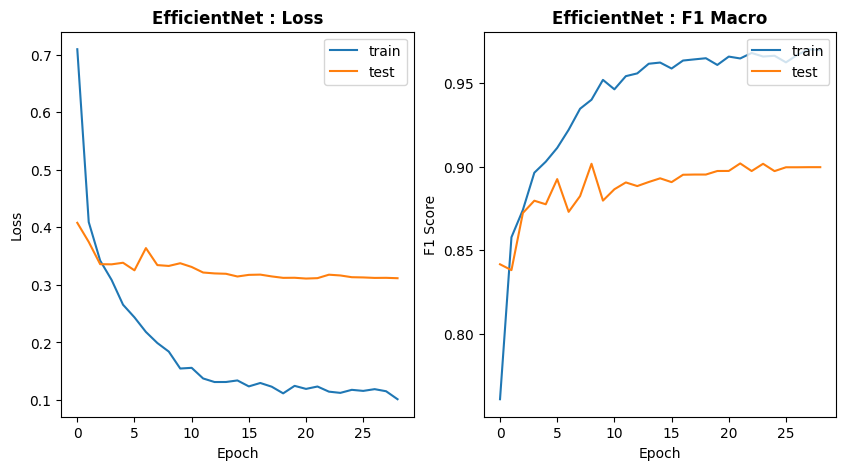

In [ ]:
plot_performance(model_name='EfficientNet',
                  f1_macro=history.history['f1_macro'],
                 val_f1_macro=history.history['val_f1_macro'],
                 loss=history.history['loss'],
                 val_loss=history.history['val_loss'])

In [ ]:
test_steps = test_generator.samples // BATCH_SIZE

test_loss, test_acc = trf_lr_efficientnet_model.evaluate(test_generator, steps=test_steps)
print('\naccuracy:', test_acc, 'loss: ',test_loss)

7/7 [==============================] - 4s 467ms/step - loss: 0.3115 - f1_macro: 0.8997

accuracy: 0.899671196937561 loss:  0.31154099106788635


In [ ]:
predict = trf_lr_efficientnet_model.predict(test_generator, steps=test_steps)
y_hat = np.argmax(predict, axis=1)
y_hat[:20]

7/7 [==============================] - 5s 395ms/step


array([2, 3, 4, 0, 0, 1, 4, 3, 1, 3, 3, 4, 2, 1, 2, 0, 3, 4, 3, 2])

In [ ]:
test_labels_df = pd.DataFrame()
test_labels_df[['class']] = test_data[['class']]

change = {
'0' : 0,
'1' : 1,
'2' : 2,
'3' : 3,
'4' : 4
}

test_labels_df['class'] = test_labels_df['class'].map(change)
test_labels_df = test_labels_df[ : test_steps*BATCH_SIZE]


y_test = np.array(test_labels_df['class'])
y_test[:20]

array([2, 3, 4, 0, 0, 1, 4, 3, 1, 3, 3, 4, 2, 1, 2, 0, 3, 4, 3, 3])

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.93      0.87      0.90        95
           2       0.85      0.91      0.88        79
           3       0.92      0.89      0.90       110
           4       0.88      0.91      0.89        88

    accuracy                           0.90       448
   macro avg       0.90      0.90      0.90       448
weighted avg       0.90      0.90      0.90       448
 



<Axes: >

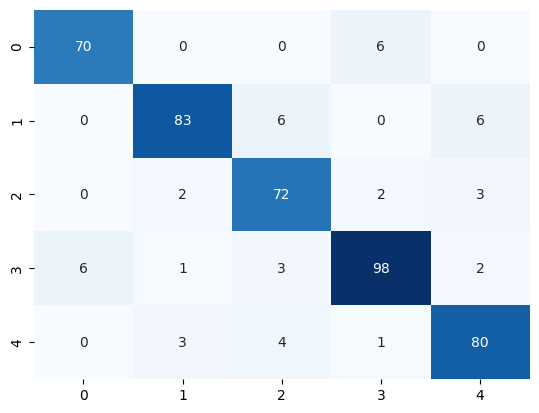

In [ ]:
print(classification_report(y_test, y_hat), '\n')
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', cbar=False)